# **ML Lab - K-Means**
Urlana Suresh Kumar - 22071A6662

# K-Means Clustering

In this notebook, we will implement the K-Means clustering algorithm from scratch, using randomly generated data. The K-Means algorithm groups data points into clusters based on their similarities by iteratively updating the centroids.



## Step 1: Import Libraries

We first import the necessary libraries: `NumPy` for numerical operations and `matplotlib` for plotting. We also import `make_blobs` from `sklearn.datasets` to generate synthetic data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Step 2: Define the KMeans Class

We define the `KMeans` class, which contains the core K-Means algorithm. It has methods to:
- `fit`: Train the model by iterating to find the centroids and assign labels to the data points.
- `_compute_distances`: Calculate the Euclidean distance between each data point and the centroids.
- `predict`: Assign labels to new data points based on the learned centroids.

In [2]:
class KMeans:
    def __init__(self, n_clusters=3, max_iterations=100, tolerance=1e-4):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.centroids = None
        self.labels = None

    def fit(self, X):
        n_samples, n_features = X.shape
        # Randomly initialize the centroids
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iterations):
            # Step 1: Assign labels based on closest centroid
            distances = self._compute_distances(X)
            self.labels = np.argmin(distances, axis=1)

            # Step 2: Calculate new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence (if centroids do not change significantly)
            if np.all(np.abs(new_centroids - self.centroids) < self.tolerance):
                break
            self.centroids = new_centroids

    def _compute_distances(self, X):
        # Calculate the distance from each point to each centroid
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

    def predict(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

## Step 3: Generate Sample Data

We generate sample data with `make_blobs` that simulates data points grouped into 3 clusters.


In [4]:
def generate_data(n_samples=300, n_features=2, centers=3, cluster_std=0.60):
    X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=n_features, cluster_std=cluster_std)
    return X, y

# Generate data
X, _ = generate_data()

## Step 4: Fit the KMeans Model

We then create an instance of the `KMeans` class, fit the model to the data, and predict the cluster labels for each point.

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Predict the labels for the data points
predictions = kmeans.predict(X)

## Step 5: Plot the Results

Finally, we visualize the results by plotting the data points and centroids. The centroids are shown as red 'X' markers, and the data points are colored according to their assigned cluster.

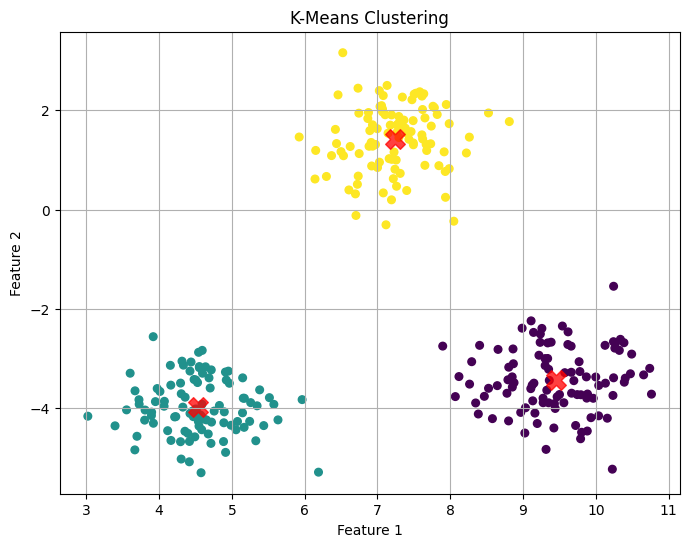

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predictions, s=30, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Centroids
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

# Conclusion

This notebook demonstrates how to implement and visualize the K-Means clustering algorithm from scratch.